In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score

import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler



% matplotlib inline

/home/sangrador/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_pickle('finalized_data.pickle')

### Drop NA's to avoid errors from log calculation

In [4]:
df = df.dropna(how='any', axis=0)

In [7]:
X= df[['Gl_days', 'Am_days',
       'Abstract_length','Direct For Biological Sciences',
       'Direct For Computer & Info Scie & Enginr',
       'Direct For Education and Human Resources',
       'Direct For Mathematical & Physical Scien',
       'Direct For Social, Behav & Economic Scie',
       'Directorate For Engineering', 'Directorate For Geosciences',
       'Directorate for Geosciences',
          '2016_RD_exp_rank', '2016_RD_perc',
       'Rank_gradstudents_x', 'Rank_doctorates','Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas',
      'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']].fillna('0')


#X=df['Gl_days']

### Add 1 to every item in the dependent variable (Award Amounts) to avoid divide by zero errors

In [8]:
df['Awards1'] = df['Award_amt'].apply(lambda x: x+1)

### Take log of every row of dependent variable

In [9]:
df['Awardlog']=df['Awards1'].apply(lambda x:np.log(x))


In [10]:
y=df['Awardlog']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
lr = LinearRegression()
# Fit the model against the training data
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)


In [13]:
y_pred = lr.predict(X_test)

In [14]:
# Evaluate the model against the testing data
lr.score(X_test, y_test)

0.3854243021374366

In [15]:
lr.coef_, lr.intercept_

(array([ 1.51197407e-03,  1.01139903e-04, -1.10483261e-02,  9.58300701e-02,
         2.59276624e-01,  2.53153028e-01, -5.00020461e-02, -5.89930440e-01,
         1.21257680e-01, -8.95849166e-02, -1.31770983e-12,  2.25195575e-03,
        -2.83481788e-02,  2.23367476e-04,  6.40805141e-05,  1.90320471e-02,
         1.44328993e-15,  2.68051186e-02, -9.99200722e-16,  7.04624682e-02,
        -6.54904216e-02, -3.06673991e-02, -1.10492496e-01,  1.07093721e-01,
        -8.30938426e-02,  1.62566531e-01,  1.05471187e-15,  2.77555756e-17,
        -1.16444746e-01,  4.58947873e-03, -6.20563247e-02, -8.10798575e-02,
         2.63311885e-02,  1.51267887e-15, -9.11248409e-02,  1.20185584e-02,
         2.54938598e-02,  8.33447894e-02, -7.43135985e-02, -3.42589491e-01,
        -1.71401172e-01, -9.22375661e-03, -2.35922393e-16, -3.01239432e-02,
         3.74700271e-16, -6.00628297e-02, -9.00168994e-03, -1.52149026e-02,
         2.46334159e-02, -7.43439901e-02, -8.32667268e-17, -2.80644454e-02,
        -1.2

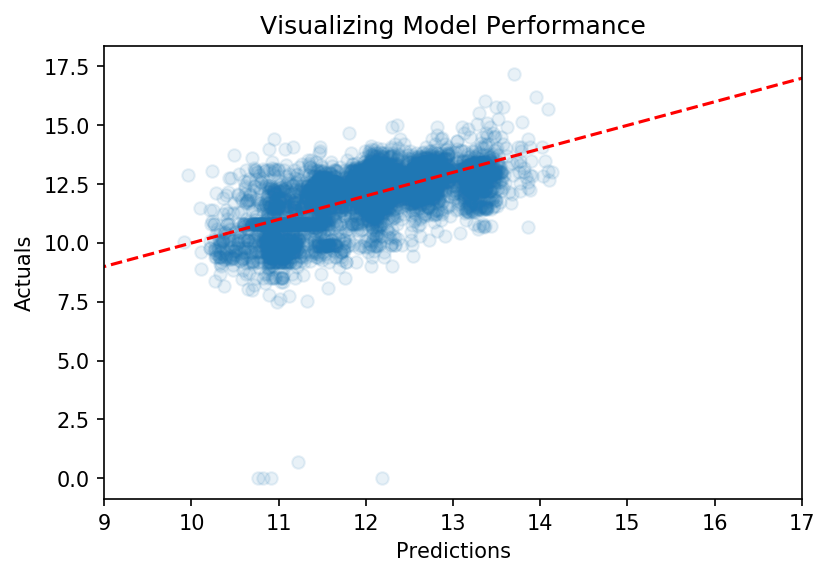

In [17]:


plt.figure(dpi=150)
plt.scatter(y_pred, y_test, alpha=0.1);
plt.xlim(9,17)
plt.xlabel("Predictions");
plt.ylabel("Actuals");
plt.plot([min(y),max(y)],[min(y),max(y)],'r--')
plt.title("Visualizing Model Performance");
#plt.xticks(rotation=45);
#plt.ylim(-150,1000000)
#plt.savefig('logpred.png')

In [18]:
#mse = metrics.mean_squared_error(y_test, y_pred)
#print(mse)

print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("Training set R2 Score:", metrics.r2_score(y_train, y_pred_train))

Training set RMSE: 0.9409870132756253
Training set R2 Score: 0.3989432264082736


In [19]:

print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Test set R2 Score:", metrics.r2_score(y_test, y_pred))

Test set RMSE: 0.9359706531968374
Test set R2 Score: 0.3854243021374366


In [22]:
residuals =[y_test-y_pred]

(-5, 5)

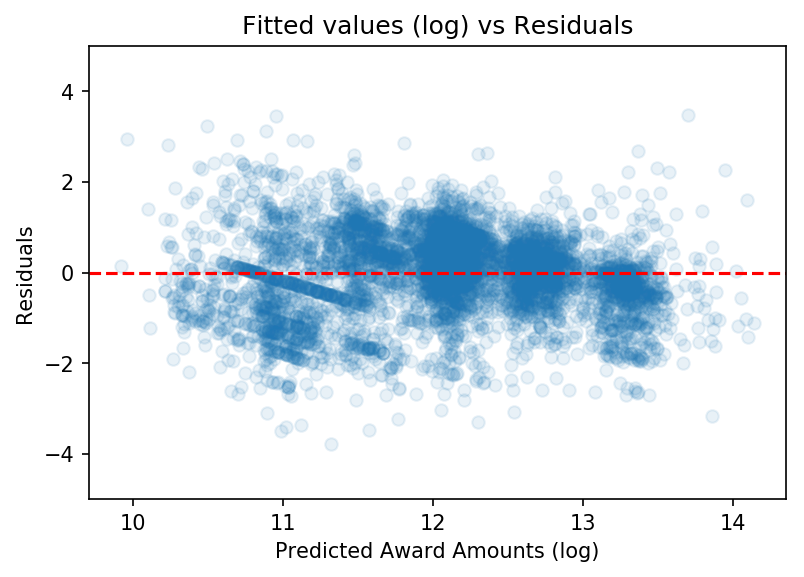

In [23]:
plt.figure(dpi=150)
plt.scatter(y_pred,residuals,alpha=0.1);
#plt.xlim(0,0.3*1e7)
plt.xlabel("Predicted Award Amounts (log)");
plt.ylabel("Residuals");
plt.axhline(y=0,color='r', linestyle='--')
plt.title("Fitted values (log) vs Residuals");
#plt.xticks(rotation=25);
plt.ylim(-5,5)
#plt.savefig('residuals2.png')